# Задача №2. Проектирование производственного участка

Имеется участок с N станками. Среднее время между наладками составляет Tc минут, среднее время наладки – Ts минут. Все потоки случайных событий считать пуассоновскими. Построить графики от числа наладчиков: математического ожидания числа простаивающих станков; математического ожидания числа станков, ожидающих обслуживания; вероятности ожидания обслуживания; математического ожидания числа занятых наладчиков; коэффициента занятости наладчиков.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

Tc = 371 #время между наладками
Ts = 7 #время наладки 


l = 1/Tc #интенсивность прихода заявок на наладку
m = 1/Ts #интенсивность обслуживания 
N = 49 #количество станков

In [23]:
def count_P0 (n, q): # n - количество работающих отладчиков, q - количество мест для очереди
    s = 1
    koeff = 1
    for i in range (1, n+1):
        s = s + koeff * (N + 1 -i) * l / m / i 
        koeff = koeff * (N + 1 -i) * l / m / i  
    for i in range (1, q+1):
        s = s + ( koeff * (N + 1 - n -i)* l / m / n)   
        koeff = koeff * (N + 1 - n -i)* l / m / n
    p = 1 / s
    return(p)

#вероятность нахождения в состоянии
def count_P (n, q, P0, flag):
    p = (l**n) / (m**n) /  math.factorial(n) * P0
    for i in range (1, n+1):
        p = p * (N + 1 -i)     
    if flag:
        for i in range (1, q+1):
            p = p * (N + 1 - n - i) * l / m / n
    return(p)

#математическоe ожидания числа простаивающих станков
def N_math_exp (n, q, p0):
    N_sr = 0
    for j in range (1, n+1):
        N_sr = N_sr + j*count_P(j, q, p0, 0)
    for i in range (1, q+1):
        N_sr = N_sr + (n+i)*count_P(n, i, p0, 1)
        
    return(N_sr)

#математическое ожидание числа занятых наладчиков
def M_math_exp (n, q, p0):
    M_sr = 0
    for j in range (1, n+1):
        M_sr = M_sr + j*count_P(j, q, p0, 0)
    
    for i in range (1, q+1):
        M_sr = M_sr + n*count_P(n, i, p0, 1)
        
    return(M_sr)

#вероятность ожидания обслуживания
def Prob_q (n, q, p0):
    Pq = 0
    for i in range (1, q+1):
        Pq = Pq + count_P(n, i, p0, 1)
        
    return(Pq)

#математическое ожидание числа станков, ожидающих обслуживание
def Q_math_exp (n, q, p0):
    Q_sr = 0
    for i in range (1, q+1):
        Q_sr = Q_sr + i*count_P(n, i, p0, 1)
    return(Q_sr)


def plot(firstDataset, secondDataset, inf1, inf2):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
    axes.set_xlabel(inf1, fontsize=12)
    axes.set_ylabel(inf2, fontsize=12)
    axes.grid()
    axes.plot(firstDataset, secondDataset)

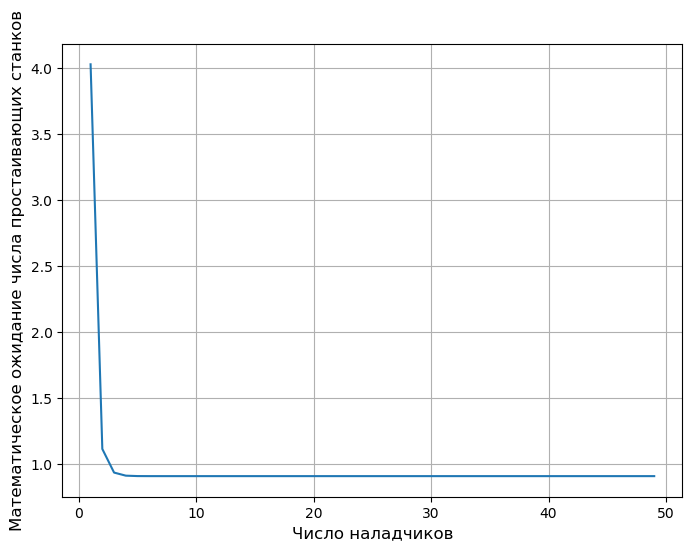

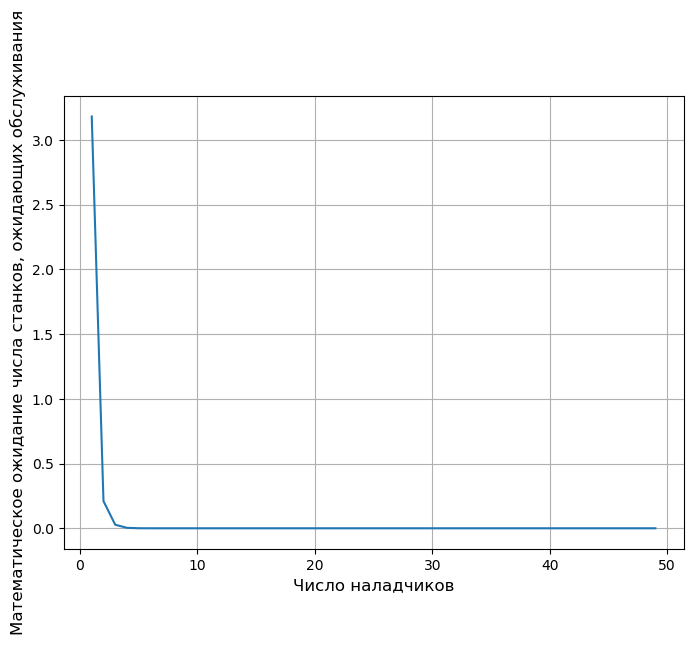

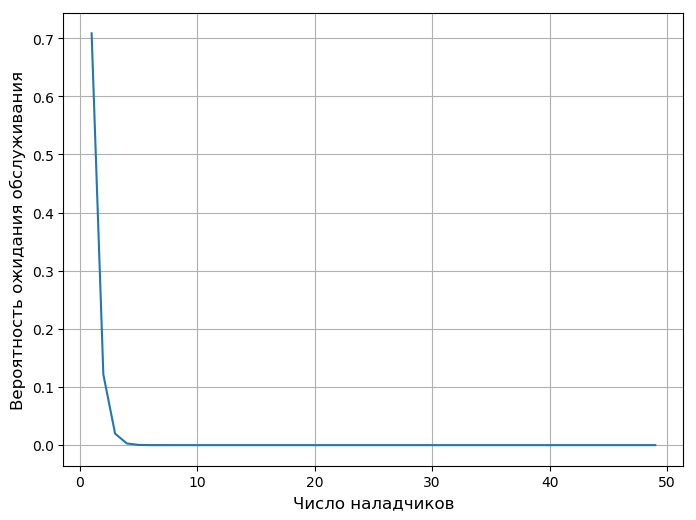

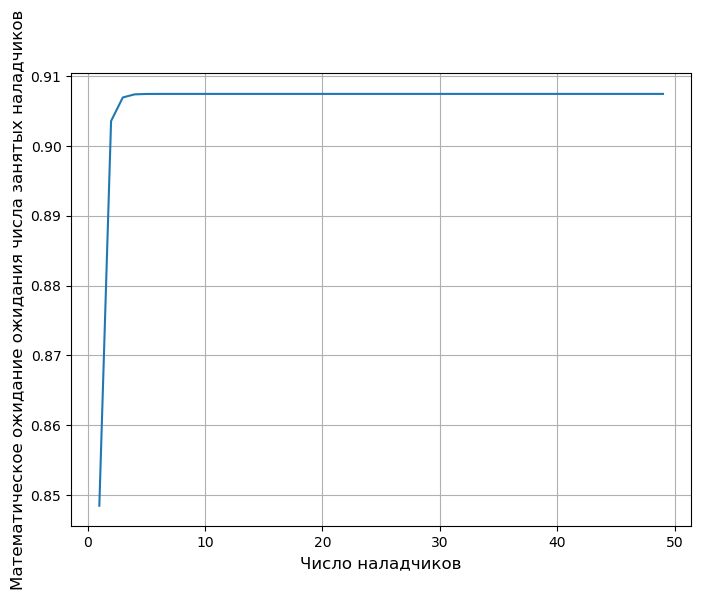

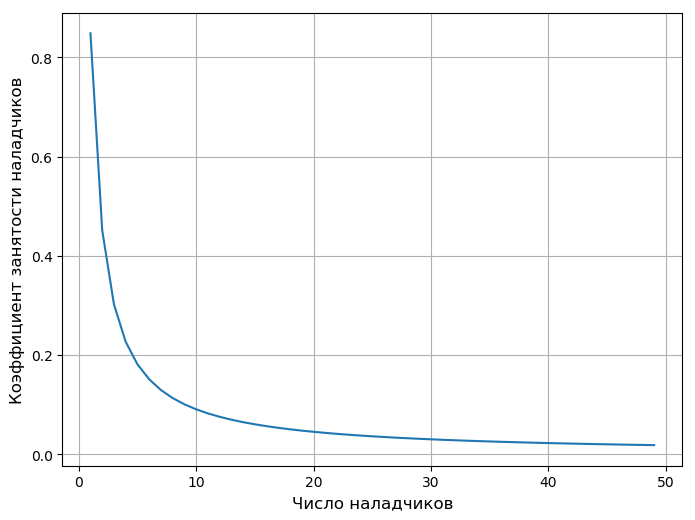

In [25]:
i = 0
p0 = []
p0.append(1)
for i in range(0, N):
    p0.append(count_P0(i+1, N-i-1))
    
num = [i for i in range (1, N+1)]

N_mas = []
for i in range (1, N+1):
    N_sr =  N_math_exp (i, N-i-1, p0[i])
    N_mas.append(N_sr)
plot(num, N_mas, "Число наладчиков", "Математическое ожидание числа простаивающих станков")


Q = []
for i in range (1, N+1):
    Q_sr =  Q_math_exp (i, N-i-1, p0[i])
    Q.append(Q_sr)
plot(num, Q, "Число наладчиков", "Математическое ожидание числа станков, ожидающих обслуживания")

P_q = []
for i in range (1, N+1): 
    P_q.append(Prob_q (i,  N-i-1, p0[i]))
plot(num, P_q, "Число наладчиков", "Вероятность ожидания обслуживания")

M = []
for i in range (1, N+1):
    M_sr =  M_math_exp (i, N-i-1, p0[i])
    M.append(M_sr)
plot(num, M, "Число наладчиков", "Математическое ожидание ожидания числа занятых наладчиков")


koeff = []
for i in range (1, N+1):
    koeff.append(M[i-1]/i)
plot(num, koeff, "Число наладчиков", "Коэффициент занятости наладчиков")

plt.show()